In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_squared_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
MODEL_NAME = "0001_0100-64-convsim-xc4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/
Noisy files:8086
Nitid files:8086
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/validation/
Noisy files:2000
Nitid files:2000


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience=50, \
                callbacks=[model_checkpoint_callback])

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
253/253 [==============================] - 8s 16ms/step - loss: 0.0055 - val_loss: 0.0051
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_01-0.01\assets
Epoch 2/320
  5/253 [..............................] - ETA: 8s - loss: 0.0039

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0033 - val_loss: 0.0043
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_02-0.00\assets
Epoch 3/320
  5/253 [..............................] - ETA: 6s - loss: 0.0030

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0027 - val_loss: 0.0039
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_03-0.00\assets
Epoch 4/320
  4/253 [..............................] - ETA: 5s - loss: 0.0026

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 17ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 5/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 6/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0024 - val_loss: 0.0038
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_06-0.00\assets
Epoch 7/320
  3/253 [..............................] - ETA: 9s - loss: 0.0020

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 17ms/step - loss: 0.0024 - val_loss: 0.0037
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_07-0.00\assets
Epoch 8/320
  5/253 [..............................] - ETA: 6s - loss: 0.0026

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 9/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0037
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_09-0.00\assets
Epoch 10/320
  5/253 [..............................] - ETA: 7s - loss: 0.0025

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 11/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0035
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_11-0.00\assets
Epoch 12/320
  5/253 [..............................] - ETA: 6s - loss: 0.0022

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 13/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 14/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 15/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 16/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 17/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 18/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 19/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 20/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0035
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 22/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0034
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_22-0.00\assets
Epoch 23/320
  7/253 [..............................] - ETA: 5s - loss: 0.0020

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 24/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 25/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 26/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 27/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 28/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 29/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0022 - val_loss: 0.0034
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_29-0.00\assets
Epoch 30/320
  6/253 [..............................] - ETA: 6s - loss: 0.0022

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 31/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0033
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_31-0.00\assets
Epoch 32/320
  5/253 [..............................] - ETA: 6s - loss: 0.0022

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0033
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4_checkpoint__weights_32-0.00\assets
Epoch 33/320
  5/253 [..............................] - ETA: 6s - loss: 0.0020

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 34/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 35/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 36/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 37/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 38/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 39/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 40/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 41/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 42/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 54/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 55/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 56/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 57/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 58/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 59/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 60/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 61/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 62/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0021 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 79/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 80/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 81/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 82/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 83/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 84/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 85/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 86/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 87/320
253/253 [==============================] - 4s 14ms/step - loss: 0.0020 - 

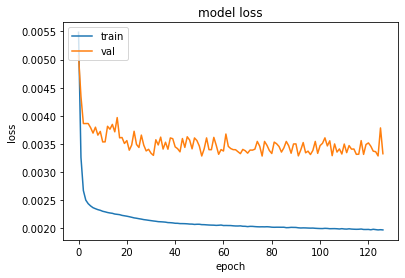

Best Epoch:77


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2000
Best RMSENZ  =1942 (0.97)
Best MAENZ   =1870 (0.94)
Best PSNR    =1942 (0.97)
Best Accuracy=1610 (0.81)
RMSE-NZ  Pred=0.0499  Noisy=0.1151
MAE-NZ   Pred=0.0419  Noisy=0.0945
PSNR     Pred=11.7 dB Noisy=5.1 dB
Accuracy Pred=0.27    Noisy=0.12
SSM      Pred=0.84    Noisy=0.29
HOG MSE  Pred=0.12    Noisy=0.15


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


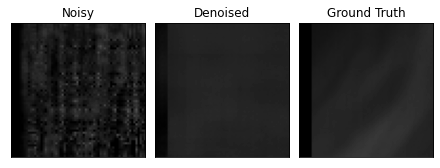

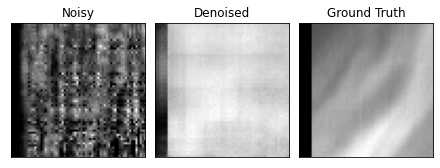

RMSE-NZ  Pred=0.0335  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0263  Noisy=0.0607 BEST
PSNR     Pred=16.4 dB Noisy=9.3 dB BEST
Accuracy Pred=0.29    Noisy=0.11 BEST
SSM      Pred=0.89    Noisy=0.40
HOG MSE  Pred=0.07    Noisy=0.15
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


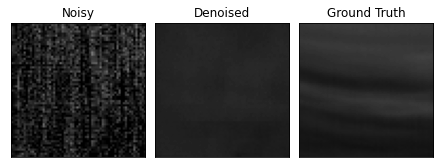

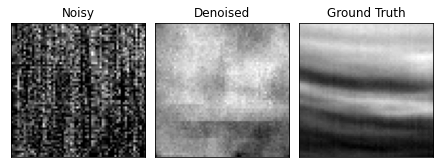

RMSE-NZ  Pred=0.0496  Noisy=0.1043 BEST
MAE-NZ   Pred=0.0415  Noisy=0.0869 BEST
PSNR     Pred=14.1 dB Noisy=7.7 dB BEST
Accuracy Pred=0.13    Noisy=0.06 BEST
SSM      Pred=0.90    Noisy=0.12
HOG MSE  Pred=0.26    Noisy=0.22
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


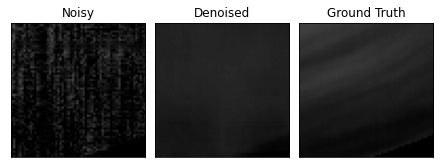

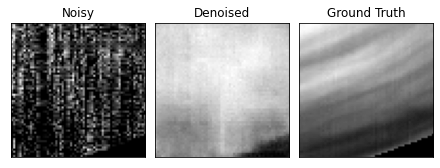

RMSE-NZ  Pred=0.0414  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0340  Noisy=0.0800 BEST
PSNR     Pred=15.7 dB Noisy=8.4 dB BEST
Accuracy Pred=0.19    Noisy=0.06 BEST
SSM      Pred=0.84    Noisy=0.19
HOG MSE  Pred=0.14    Noisy=0.21
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


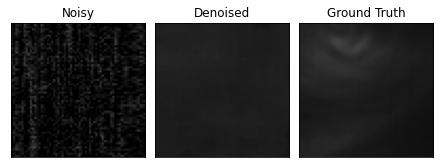

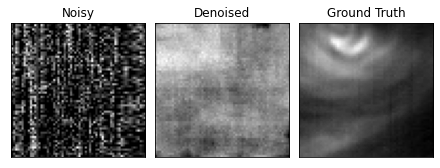

RMSE-NZ  Pred=0.0316  Noisy=0.0938 BEST
MAE-NZ   Pred=0.0253  Noisy=0.0805 BEST
PSNR     Pred=18.6 dB Noisy=9.1 dB BEST
Accuracy Pred=0.21    Noisy=0.06 BEST
SSM      Pred=0.90    Noisy=0.19
HOG MSE  Pred=0.11    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


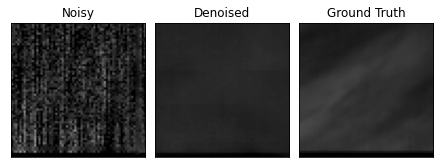

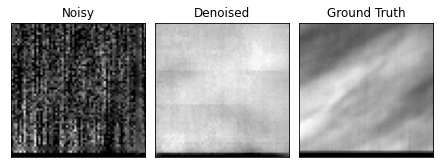

RMSE-NZ  Pred=0.0498  Noisy=0.1126 BEST
MAE-NZ   Pred=0.0420  Noisy=0.0917 BEST
PSNR     Pred=15.2 dB Noisy=8.1 dB BEST
Accuracy Pred=0.10    Noisy=0.07 BEST
SSM      Pred=0.84    Noisy=0.13
HOG MSE  Pred=0.05    Noisy=0.27
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


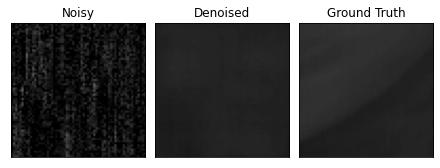

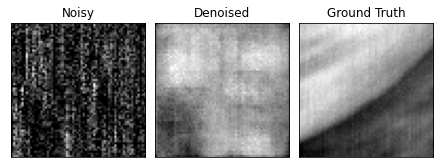

RMSE-NZ  Pred=0.0368  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0296  Noisy=0.1006 BEST
PSNR     Pred=15.1 dB Noisy=5.2 dB BEST
Accuracy Pred=0.25    Noisy=0.05 BEST
SSM      Pred=0.91    Noisy=0.16
HOG MSE  Pred=0.13    Noisy=0.19
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


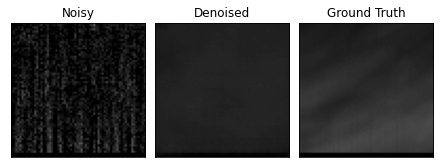

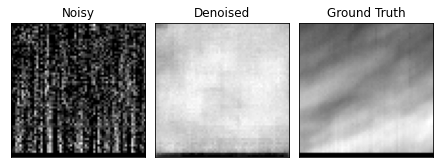

RMSE-NZ  Pred=0.0697  Noisy=0.1357 BEST
MAE-NZ   Pred=0.0519  Noisy=0.1172 BEST
PSNR     Pred=12.4 dB Noisy=6.6 dB BEST
Accuracy Pred=0.20    Noisy=0.04 BEST
SSM      Pred=0.84    Noisy=0.17
HOG MSE  Pred=0.06    Noisy=0.25
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


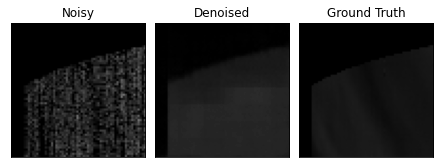

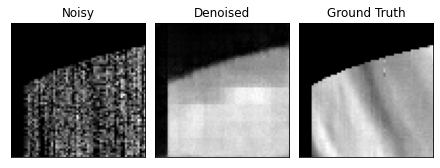

RMSE-NZ  Pred=0.0469  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0367  Noisy=0.0807 BEST
PSNR     Pred=7.9 dB Noisy=1.2 dB BEST
Accuracy Pred=0.32    Noisy=0.10 BEST
SSM      Pred=0.81    Noisy=0.39
HOG MSE  Pred=0.09    Noisy=0.08
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


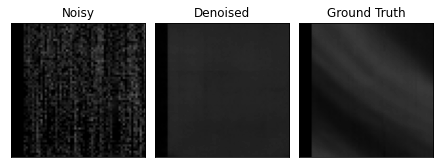

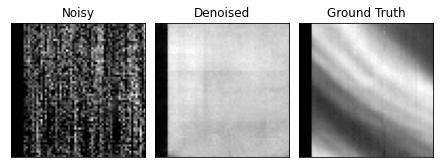

RMSE-NZ  Pred=0.0494  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0421  Noisy=0.0792 BEST
PSNR     Pred=13.3 dB Noisy=7.5 dB BEST
Accuracy Pred=0.16    Noisy=0.07 BEST
SSM      Pred=0.81    Noisy=0.23
HOG MSE  Pred=0.12    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


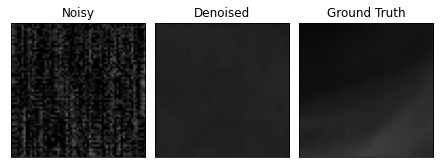

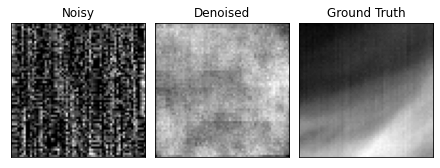

RMSE-NZ  Pred=0.0554  Noisy=0.0971 BEST
MAE-NZ   Pred=0.0483  Noisy=0.0798 BEST
PSNR     Pred=12.9 dB Noisy=8.0 dB BEST
Accuracy Pred=0.11    Noisy=0.07 BEST
SSM      Pred=0.82    Noisy=0.14
HOG MSE  Pred=0.15    Noisy=0.15
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


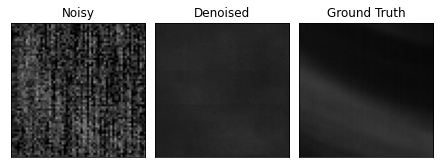

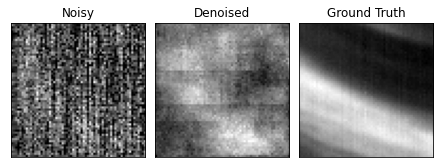

RMSE-NZ  Pred=0.0666  Noisy=0.1540 BEST
MAE-NZ   Pred=0.0586  Noisy=0.1226 BEST
PSNR     Pred=10.6 dB Noisy=3.3 dB BEST
Accuracy Pred=0.07    Noisy=0.05 BEST
SSM      Pred=0.73    Noisy=0.08
HOG MSE  Pred=0.26    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


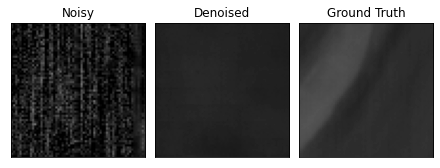

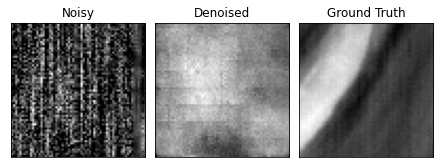

RMSE-NZ  Pred=0.0855  Noisy=0.1426 BEST
MAE-NZ   Pred=0.0698  Noisy=0.1207 BEST
PSNR     Pred=11.8 dB Noisy=7.4 dB BEST
Accuracy Pred=0.04    Noisy=0.04 BEST
SSM      Pred=0.76    Noisy=0.13
HOG MSE  Pred=0.26    Noisy=0.19
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


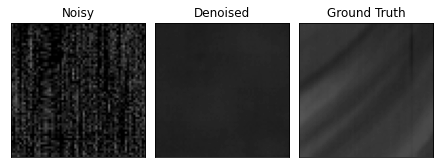

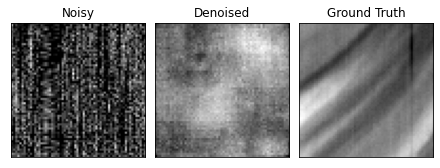

RMSE-NZ  Pred=0.0847  Noisy=0.1416 BEST
MAE-NZ   Pred=0.0747  Noisy=0.1219 BEST
PSNR     Pred=12.0 dB Noisy=7.5 dB BEST
Accuracy Pred=0.03    Noisy=0.04 WORST
SSM      Pred=0.74    Noisy=0.12
HOG MSE  Pred=0.26    Noisy=0.27
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


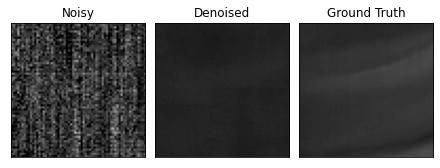

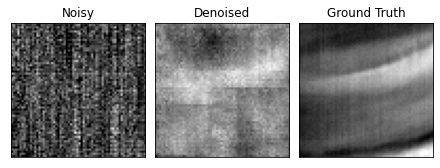

RMSE-NZ  Pred=0.0676  Noisy=0.1312 BEST
MAE-NZ   Pred=0.0620  Noisy=0.1051 BEST
PSNR     Pred=13.0 dB Noisy=7.2 dB BEST
Accuracy Pred=0.01    Noisy=0.05 WORST
SSM      Pred=0.85    Noisy=0.07
HOG MSE  Pred=0.13    Noisy=0.18
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


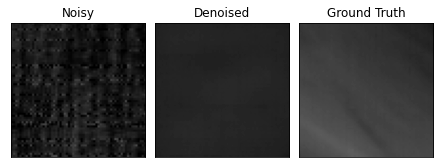

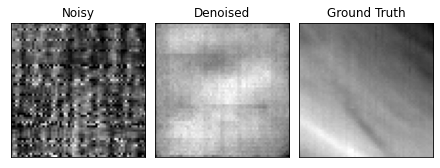

RMSE-NZ  Pred=0.1127  Noisy=0.1634 BEST
MAE-NZ   Pred=0.1026  Noisy=0.1488 BEST
PSNR     Pred=10.2 dB Noisy=7.0 dB BEST
Accuracy Pred=0.02    Noisy=0.01 BEST
SSM      Pred=0.78    Noisy=0.34
HOG MSE  Pred=0.14    Noisy=0.12
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )